In [37]:
#Cargamos las librerías necesarias para el análisis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import time 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat

In [38]:
from scipy.io import loadmat
import os
from pathlib import Path
from glob import glob
import pathlib
from scipy.io import loadmat
data=[]
wdata=[]
i=0
contador=0
current_dir = '../data/Francis_data/Francis_data//Baseline_fmri/HC'
group=1 # los grupos están organizados por carpetas. en este caso HC = grupo 1
all_sub_dir_paths = glob(str(current_dir) + '/*/') 
feat=[]
for file in all_sub_dir_paths:
    i=0
    for file in sorted(glob(file + '/*.mat')):
        dat=loadmat(file)
        p=dat['S']
        thePoints=dat['S']['thePoints'][0][0]
        Sbuttons=dat['S']['Sbuttons']
        Ts=dat['S']['Ts'][0][0][0]
        trial=dat['S']['trial_cond'][0][0][i][0]
        length=len(Sbuttons[0][0])
        rule = Ts[-1]/length
        time = np.transpose(np.arange(start=0, stop=Ts[-1]+rule, step=rule))
        if time.shape[0] != thePoints.shape[0]:
            time = time[0:thePoints.shape[0]]
        #convertir time en float con 17 decimales
        time = time.astype(np.float128)
        time = np.around(time, decimals=17)
        #convertir thePoints en entero
        thePoints = thePoints.astype(np.int32)
        data=[time, thePoints[:,0], thePoints[:,1], trial,group]
        data=np.transpose(data)
    #    data = data[(data[1] != 683) & (data[2] != 384)]
    #    data=pd.DataFrame.transpose(pd.DataFrame(data))
        wdata.append(data)
        i=i+1
        data=[]
    #    print(file,i)


/Users/carloshumbertomenesesmurillo/opt/anaconda3/envs/geo_env/lib/python3.7/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


In [39]:
current_dir = '../data/Francis_data/Francis_data//Baseline_fmri/Left_MAS'
group=2 # los grupos están organizados por carpetas. en este caso Left_MAS = grupo 2
all_sub_dir_paths = glob(str(current_dir) + '/*/')
for file in all_sub_dir_paths:
    i=0
    for file in sorted(glob(file + '/*.mat')):
        dat=loadmat(file)
        p=dat['S']
        thePoints=dat['S']['thePoints'][0][0]
        Sbuttons=dat['S']['Sbuttons']
        Ts=dat['S']['Ts'][0][0][0]
        trial=dat['S']['trial_cond'][0][0][i][0]
        length=len(Sbuttons[0][0])
        rule = Ts[-1]/length
        time = np.transpose(np.arange(start=0, stop=Ts[-1]+rule, step=rule))
        if time.shape[0] != thePoints.shape[0]:
            time = time[0:thePoints.shape[0]]
        data=[time, thePoints[:,0], thePoints[:,1], trial,group]
        data=np.transpose(data)
    #    data = data[(data[1] != 683) & (data[2] != 384)]
    #    data=pd.DataFrame.transpose(pd.DataFrame(data))
        wdata.append(data)
        i=i+1
        data=[]
    #    print(file,i)


In [40]:
current_dir = '../data/Francis_data/Francis_data//Baseline_fmri/Right_MAS'
group=0 # los grupos están organizados por carpetas. en este caso Right_MAS = grupo 0
all_sub_dir_paths = glob(str(current_dir) + '/*/')
for file in all_sub_dir_paths:
    i=0
    for file in sorted(glob(file + '/*.mat')):
        dat=loadmat(file)
        p=dat['S']
        thePoints=dat['S']['thePoints'][0][0]
        Sbuttons=dat['S']['Sbuttons']
        Ts=dat['S']['Ts'][0][0][0]
        trial=dat['S']['trial_cond'][0][0][i][0]
        length=len(Sbuttons[0][0])
        rule = Ts[-1]/length
        time = np.transpose(np.arange(start=0, stop=Ts[-1]+rule, step=rule))
        if time.shape[0] != thePoints.shape[0]:
            time = time[0:thePoints.shape[0]]
        data=[time, thePoints[:,0], thePoints[:,1], trial,group]
        data=np.transpose(data)
    #    data = data[(data[1] != 683) & (data[2] != 384)]
    #    data=pd.DataFrame.transpose(pd.DataFrame(data))
        wdata.append(data)
        i=i+1
        data=[]
    #    print(file,i)

In [41]:
data=pd.DataFrame(wdata)
data.rename(columns={0: "time", 1: "X", 2: 'Y', 3: 'event',4:"group"}, inplace=True)

In [42]:
def calculate_stroke_speed(x, y, time):
    """Calcular la velocidad del trazo."""
    distance = calculate_distance_2(x, y)
    total_distance = np.sum(distance)
    total_time = time[-1] - time[0]
    return total_distance / total_time if total_time != 0 else 0

def calculate_distance_2(x, y):
    distance = []
    for i in range(1, len(x)):
        dx = int(x[i]) - int(x[i - 1])
        dy = int(y[i]) - int(y[i - 1])
        dist = (dx ** 2 + dy ** 2) ** 0.5
        distance.append(dist)
    return distance

def calculate_diffence(data):
    diff = []
    for i in range(1, len(data)):
        diff.append(int(data[i]) - int(data[i - 1]))
    return diff
def calculate_velocity(distance, time):
    """Calcular la velocidad."""
    
    return np.diff(distance) / np.diff(time[1:])

def calculate_acceleration(velocity, time):
    """Calcular la aceleración."""
    return np.diff(velocity) / np.diff(time[2:])

def calculate_jerk(acceleration, time):
    """Calcular el jerk."""
    return np.diff(acceleration) / np.diff(time[3:])

def calculate_metrics(row):
    time = np.array(row['time'])
    x = np.array(row['X'])
    y = np.array(row['Y'])
    if len(time) == len(x) == len(y) and len(time) > 1:
        distance = calculate_distance_2(x, y)
        velocity = calculate_velocity(distance, time)
        acceleration = calculate_acceleration(velocity, time)
        jerk = calculate_jerk(acceleration, time)
        
        # Calcular las métricas para X e Y
        velocity_x = calculate_diffence(x) / np.diff(time)
        acceleration_x = np.diff(velocity_x) / np.diff(time[1:])
        jerk_x = np.diff(acceleration_x) / np.diff(time[2:])
        
        velocity_y = calculate_diffence(y) / np.diff(time)
        acceleration_y = np.diff(velocity_y) / np.diff(time[1:])
        jerk_y = np.diff(acceleration_y) / np.diff(time[2:])
        
        return velocity, acceleration, jerk, velocity_x, acceleration_x, jerk_x, velocity_y, acceleration_y, jerk_y
    else:
        return [None] * 9
data[['velocity', 'acceleration', 'jerk', 'velocity_x', 'acceleration_x', 'jerk_x', 'velocity_y', 'acceleration_y', 'jerk_y']] = data.apply(calculate_metrics, axis=1, result_type='expand')

In [43]:
data['stroke_speed'] = data.apply(lambda row: calculate_stroke_speed(row['X'], row['Y'], row['time']), axis=1)

# Convertir las columnas de velocidad, aceleración y jerk a valores absolutos
for col in ['velocity', 'acceleration', 'jerk', 'velocity_x', 'acceleration_x', 'jerk_x', 'velocity_y', 'acceleration_y', 'jerk_y']:
    data[col] = data[col].apply(lambda x: np.abs(x) if isinstance(x, np.ndarray) else x)

In [44]:
import numpy as np
from scipy import stats
def calculate_statistics(arr, column_prefix):
    arr_unique = np.unique(arr)
    mean = np.mean(arr_unique)
    median = np.median(arr_unique)
    std_dev = np.std(arr_unique)
    minimum = np.min(arr_unique)
    maximum = np.max(arr_unique)
    data_range = np.ptp(arr_unique)  # Peak to peak (max - min)
    q75, q25 = np.percentile(arr_unique, [75 ,25])
    iqr = q75 - q25
    skewness = stats.skew(arr_unique)
    kurtosis = stats.kurtosis(arr_unique)
    
    result_dict = {
        column_prefix + "mean": mean,
        column_prefix + "median": median,
        column_prefix + "std_dev": std_dev,
        column_prefix + "minimum": minimum,
        column_prefix + "maximum": maximum,
        column_prefix + "data_range": data_range,
        column_prefix + "iqr": iqr,
        column_prefix + "skewness": skewness,
        column_prefix + "kurtosis": kurtosis
    }
    
    return pd.Series(result_dict)


In [45]:
columns_to_process = [
    'velocity', 'acceleration', 'jerk',
    'velocity_x', 'acceleration_x', 'jerk_x',
    'velocity_y', 'acceleration_y', 'jerk_y'
]
for column in columns_to_process:
    column_prefix = column + "_"
    result = data[column].apply(calculate_statistics, args=(column_prefix,))
    data = pd.concat([data, result], axis=1)
    data = data.drop(columns=[column])

# Eliminar columnas adicionales que no deseas
data.drop(columns=['time', 'X', 'Y'], inplace=True)

'''
statistics_df = data[['velocity', 'acceleration', 'jerk', 'velocity_x', 'acceleration_x', 'jerk_x', 'velocity_y', 'acceleration_y', 'jerk_y']].applymap(calculate_statistics)
'''

"\nstatistics_df = data[['velocity', 'acceleration', 'jerk', 'velocity_x', 'acceleration_x', 'jerk_x', 'velocity_y', 'acceleration_y', 'jerk_y']].applymap(calculate_statistics)\n"

In [46]:
print(data.head)

<bound method NDFrame.head of       event  group  stroke_speed  velocity_mean  velocity_median  \
0         3      1    222.224360    1843.591676       461.577380   
1         4      1    637.841630    2885.550704       890.225195   
2         1      1    516.738727    1732.119756       596.822725   
3         4      1    667.954445    2776.549582       961.478041   
4         3      1    525.265672    3014.704061       751.790662   
5         4      1    929.088161    3640.169210      1131.561307   
6         2      1    391.718876    1632.583622       396.512394   
7         4      1    779.165698    3493.661553      1140.175361   
8         3      1    468.356363    3198.142000      1002.923802   
9         4      1    731.450488    2739.669675       850.827597   
10        1      1    518.400646    2169.139679       727.791233   
11        4      1    841.576886    3164.231928       948.683234   
12        3      1    510.107439    3114.904734       788.346531   
13        4      1

In [48]:
#Guardar en un csv
data.to_csv('./Statistics.csv',index=False)

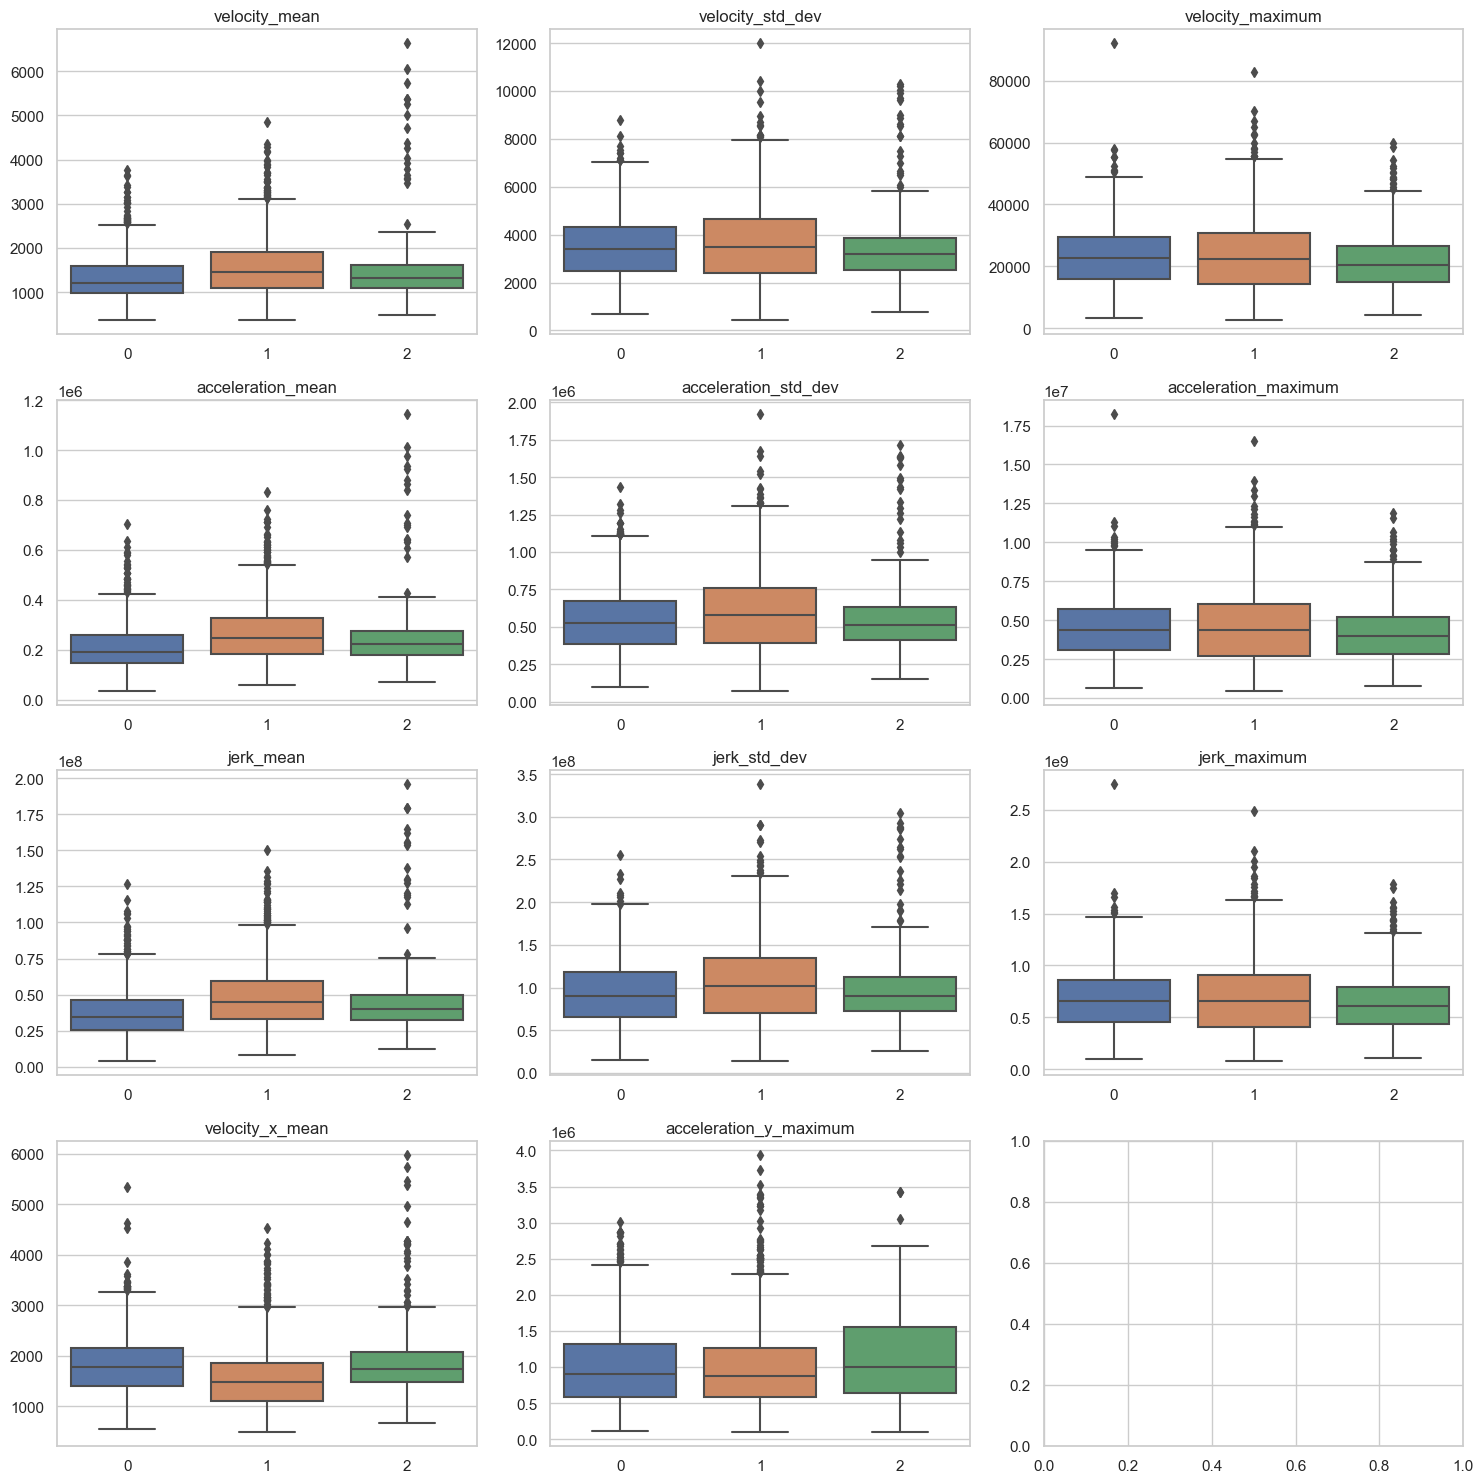

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selección de variables para la visualización
variables_seleccionadas = [
    'velocity_mean', 'velocity_std_dev', 'velocity_maximum',
    'acceleration_mean', 'acceleration_std_dev', 'acceleration_maximum',
    'jerk_mean', 'jerk_std_dev', 'jerk_maximum',
    'velocity_x_mean', 'acceleration_y_maximum'
]

# Configuración del estilo de los gráficos
sns.set(style="whitegrid")

# Creación de boxplots para las variables seleccionadas
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for i, var in enumerate(variables_seleccionadas):
    sns.boxplot(x='group', y=var, data=data, ax=axes[i])
    axes[i].set_title(var)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Ajuste de la disposición de los gráficos
plt.tight_layout()
plt.show()

In [53]:
from scipy.stats import iqr

# Función para eliminar outliers basados en el IQR
def eliminar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    filtro = ((df[columna] >= (Q1 - 1.5 * IQR)) & (df[columna] <= (Q3 + 1.5 * IQR)))
    return df.loc[filtro]

# Variables para las cuales eliminaremos outliers
variables_para_eliminar_outliers = [
    'velocity_mean', 'velocity_std_dev', 'velocity_maximum',
    'jerk_mean', 'jerk_std_dev', 'jerk_maximum', 'velocity_x_mean'
]

# Eliminación de outliers
data_sin_outliers = data.copy()
for var in variables_para_eliminar_outliers:
    data_sin_outliers = eliminar_outliers(data_sin_outliers, var)

# Información del conjunto de datos después de la eliminación de outliers
data_info_post_outliers = data_sin_outliers
data_info_post_outliers

,event,group,stroke_speed,velocity_mean,velocity_median,velocity_std_dev,velocity_minimum,velocity_maximum,velocity_data_range,velocity_iqr,...,acceleration_y_kurtosis,jerk_y_mean,jerk_y_median,jerk_y_std_dev,jerk_y_minimum,jerk_y_maximum,jerk_y_data_range,jerk_y_iqr,jerk_y_skewness,jerk_y_kurtosis
0,3,1,222.224360,1843.591676,461.577380,5454.272978,0.0,46300.114942,46300.114942,1766.178646,...,3.700015,1.208667e+07,6.000003e+06,1.681188e+07,0.0,8.600004e+07,8.600004e+07,1.075000e+07,2.300577,5.289407
2,1,1,516.738727,1732.119756,596.822725,4248.841032,0.0,31108.172344,31108.172344,717.765789,...,12.439957,1.626461e+07,6.000171e+06,3.272994e+07,0.0,2.260064e+08,2.260064e+08,9.500271e+06,3.731067,15.476854
6,2,1,391.718876,1632.583622,396.512394,5598.231832,0.0,35679.434885,35679.434885,674.520596,...,23.154387,1.959308e+07,3.999916e+06,6.272123e+07,0.0,5.099892e+08,5.099892e+08,6.999852e+06,5.237841,30.197552
10,1,1,518.400646,2169.139679,727.791233,5824.152702,0.0,45971.973260,45971.973260,900.694238,...,8.466981,2.169969e+07,8.999568e+06,3.619004e+07,0.0,2.409884e+08,2.409884e+08,1.199942e+07,3.091913,11.175156
14,2,1,449.956104,1707.954222,497.675696,5304.262086,0.0,36426.981692,36426.981692,726.347567,...,24.207903,2.122718e+07,4.499771e+06,6.038038e+07,0.0,4.999746e+08,4.999746e+08,1.199939e+07,5.154486,30.153477
16,2,1,534.962405,1900.120006,635.022838,4373.286494,0.0,33713.839282,33713.839282,824.578376,...,11.077116,2.198800e+07,5.999469e+06,4.783175e+07,0.0,3.069728e+08,3.069728e+08,1.199894e+07,3.702824,14.878467
17,3,1,502.376613,2036.975641,587.320186,5004.960539,0.0,30511.234534,30511.234534,671.094171,...,17.056873,2.149206e+07,7.000174e+06,5.025834e+07,0.0,3.500087e+08,3.500087e+08,1.200030e+07,4.166159,19.288323
18,2,1,544.984529,2067.452892,516.502389,5846.768813,0.0,40498.463215,40498.463215,885.228710,...,29.369091,2.638065e+07,4.999248e+06,6.844732e+07,0.0,6.209066e+08,6.209066e+08,1.199820e+07,5.144632,33.801873
20,2,1,422.614722,1093.792195,384.573200,3679.070672,0.0,32672.574623,32672.574623,453.866490,...,27.690007,9.203657e+06,2.999861e+06,2.254300e+07,0.0,2.019907e+08,2.019907e+08,5.249758e+06,5.767804,38.236287
21,3,1,585.378896,2407.072038,705.721705,5675.398276,0.0,42959.527451,42959.527451,873.135808,...,9.354982,2.237878e+07,5.999956e+06,4.575984e+07,0.0,2.679980e+08,2.679980e+08,1.399990e+07,3.360669,11.958311


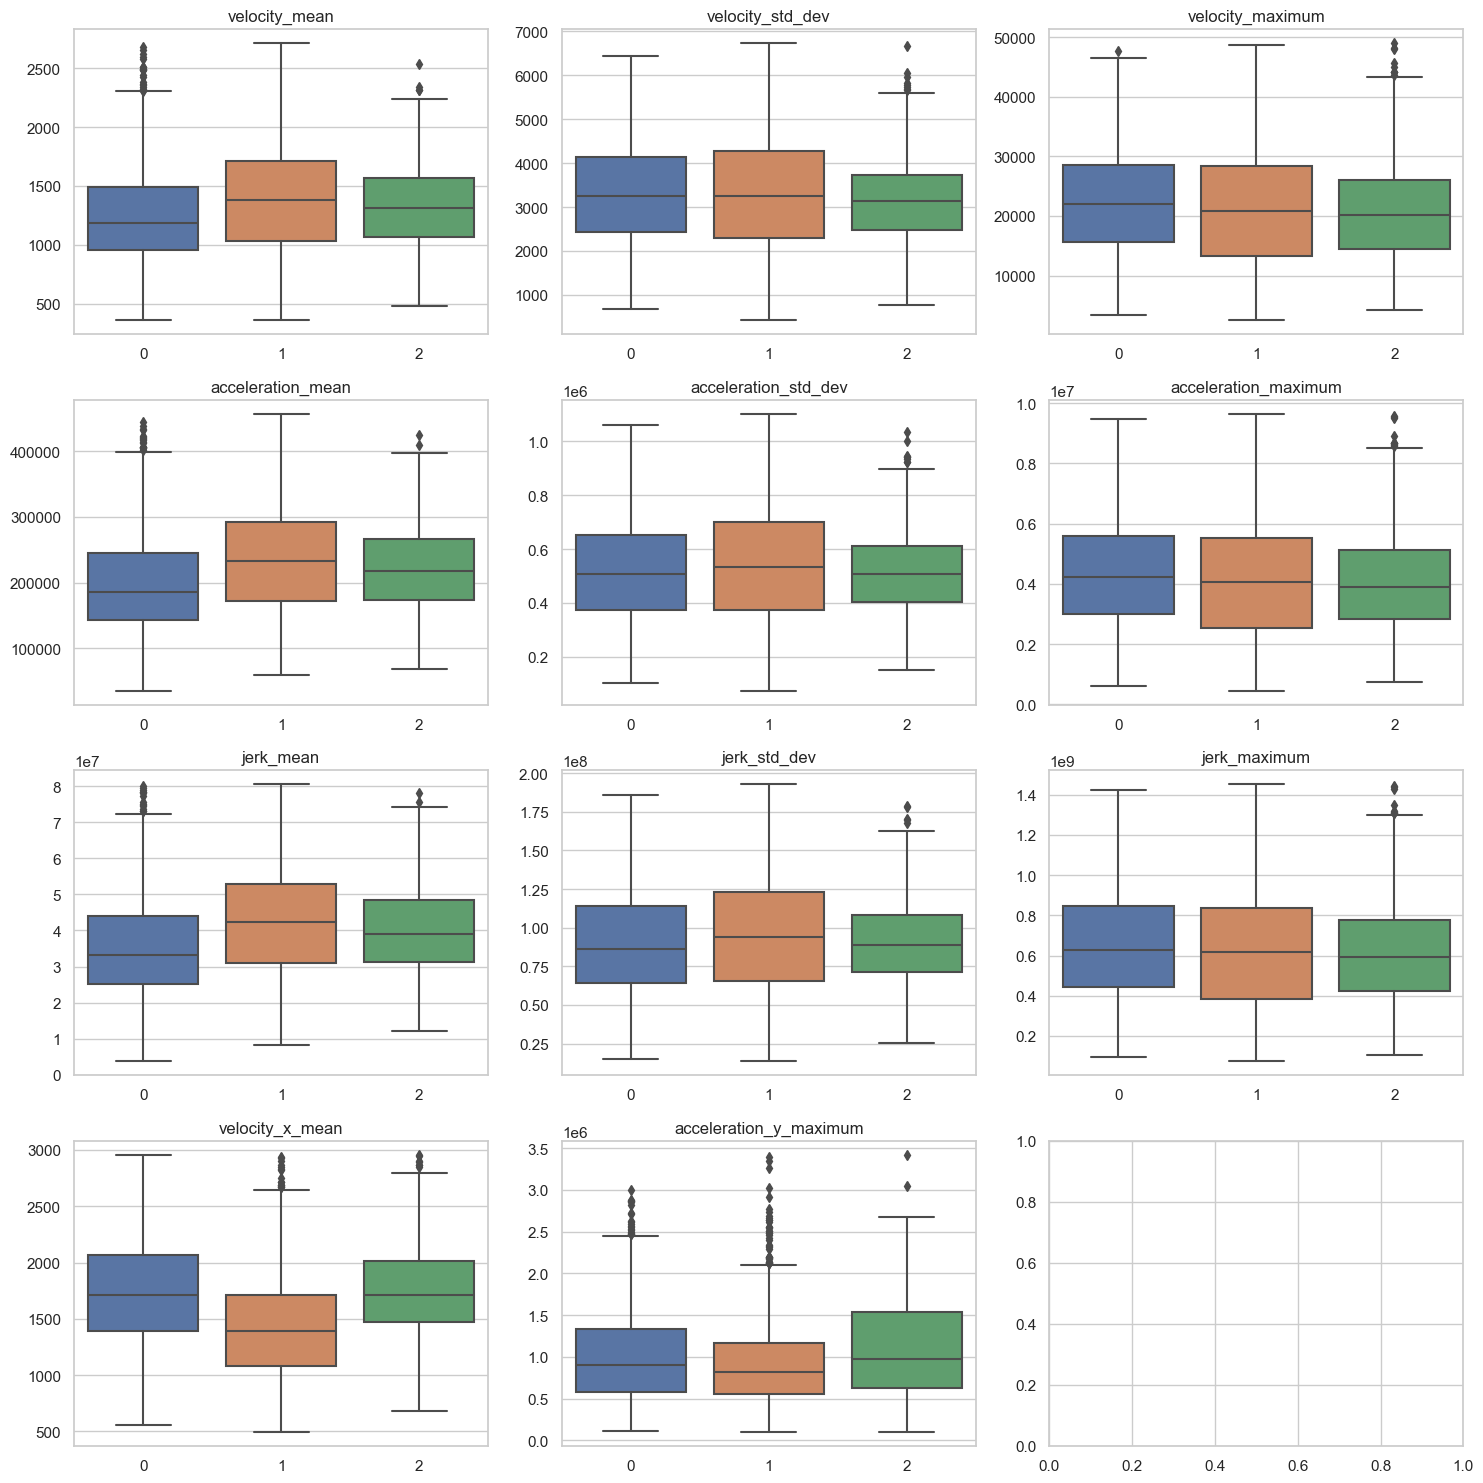

In [56]:
# Creación de boxplots para las variables seleccionadas después de la eliminación de outliers
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for i, var in enumerate(variables_seleccionadas):
    sns.boxplot(x='group', y=var, data=data_sin_outliers, ax=axes[i])
    axes[i].set_title(var)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Ajuste de la disposición de los gráficos
plt.tight_layout()
plt.show()

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Preparación de los datos
X = data.drop(['event', 'group'], axis=1)  # Eliminamos 'event' ya que parece ser un identificador
y = data['group']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificación de las dimensiones de los conjuntos de datos
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2144, 82), (536, 82), (2144,), (536,))

In [58]:
# Creación y entrenamiento del modelo de Random Forest
modelo_rf = RandomForestClassifier(random_state=42, n_jobs=-1)
modelo_rf.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = modelo_rf.predict(X_test)

# Cálculo de la precisión del modelo
precision = accuracy_score(y_test, y_pred)
precision

0.7705223880597015

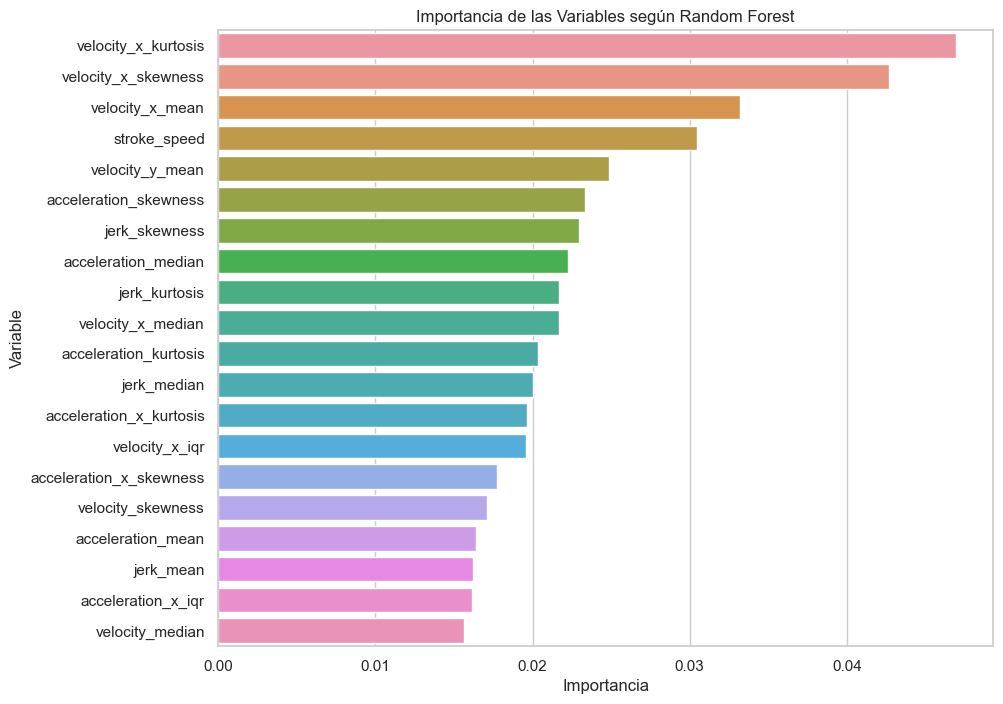

,Variable,Importancia
36,velocity_x_kurtosis,0.046955
35,velocity_x_skewness,0.042655
28,velocity_x_mean,0.033196
0,stroke_speed,0.030462
55,velocity_y_mean,0.024841
17,acceleration_skewness,0.023311
26,jerk_skewness,0.022978
11,acceleration_median,0.022285
27,jerk_kurtosis,0.021684
29,velocity_x_median,0.021657


In [59]:
import numpy as np

# Obtención de la importancia de las variables
importancias = modelo_rf.feature_importances_

# Creación de un DataFrame para visualizar las importancias de las variables
importancias_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importancias
})

# Ordenación de las variables por importancia
importancias_df = importancias_df.sort_values(by='Importancia', ascending=False)

# Visualización de las 20 variables más importantes
importancias_df_head = importancias_df.head(20)

# Gráfico de barras para las importancias de las variables
plt.figure(figsize=(10, 8))
sns.barplot(x='Importancia', y='Variable', data=importancias_df_head)
plt.title('Importancia de las Variables según Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()

importancias_df_head

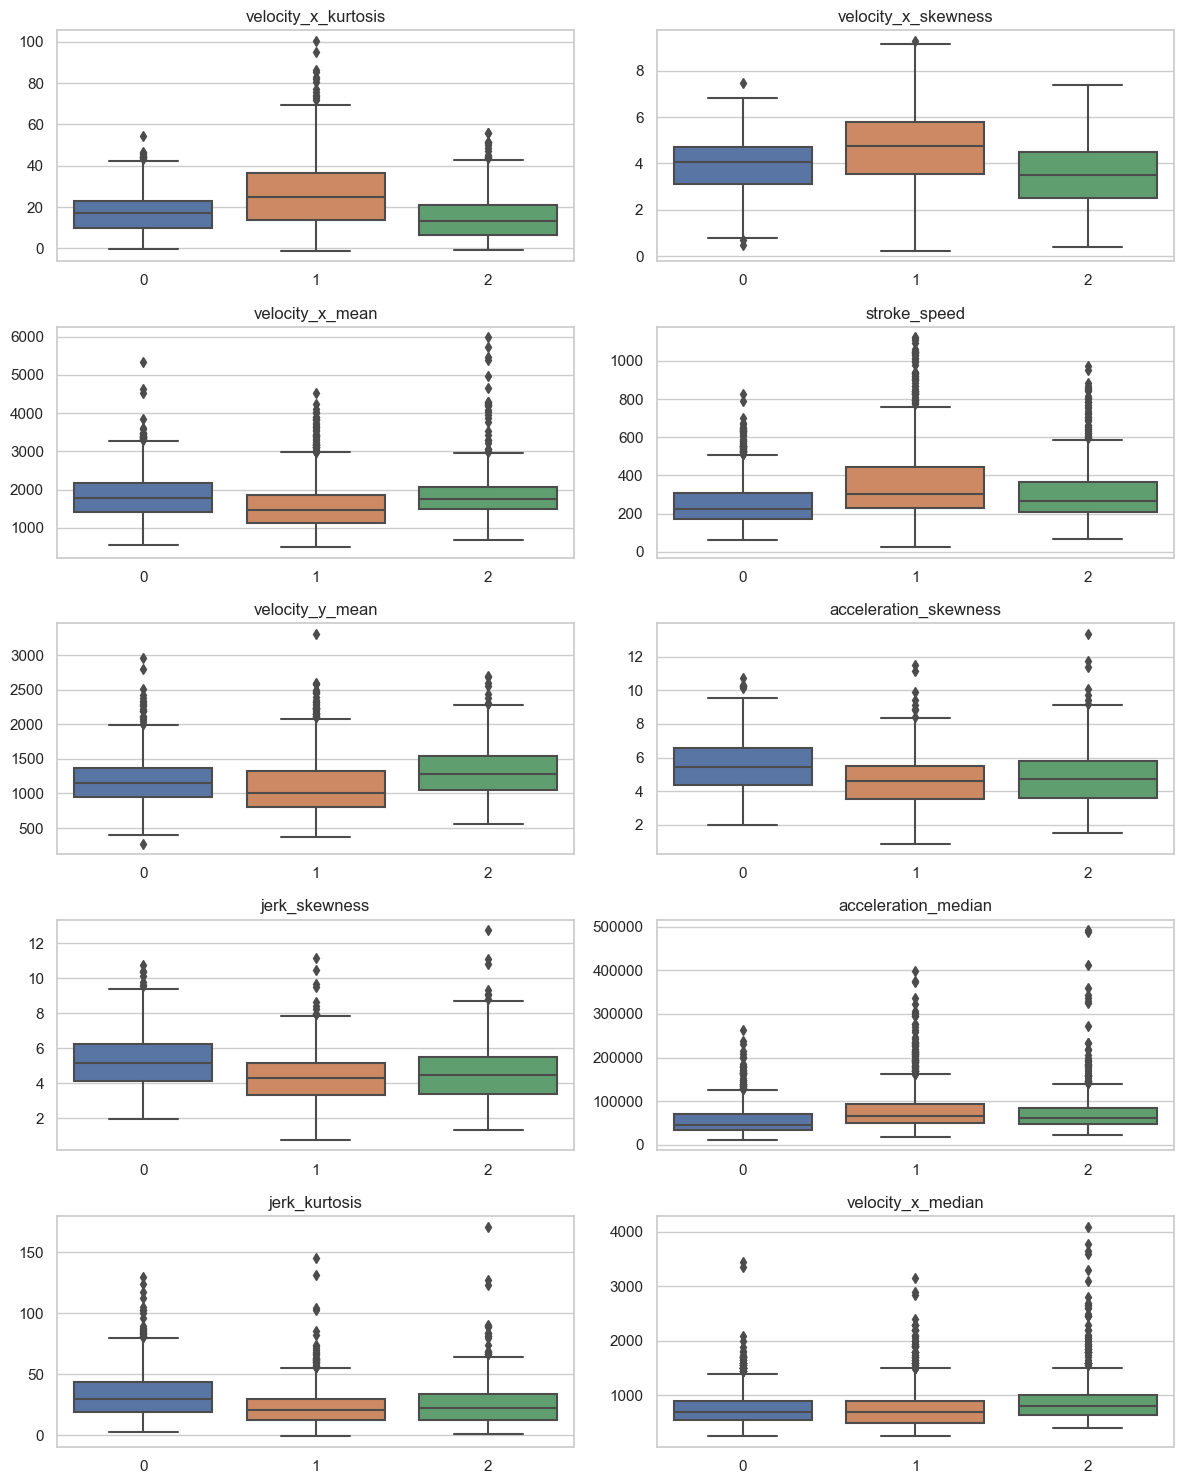

In [60]:
# Selección de las 10 características más importantes
top_10_variables = importancias_df_head['Variable'].head(10)

# Creación de boxplots para las 10 características más importantes
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))
axes = axes.flatten()

for i, var in enumerate(top_10_variables):
    sns.boxplot(x='group', y=var, data=data, ax=axes[i])
    axes[i].set_title(var)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Ajuste de la disposición de los gráficos
plt.tight_layout()
plt.show()

In [67]:
# Eliminación de outliers para las 10 características más importantes
data_sin_outliers_top_10 = data.copy()
for var in top_10_variables:
    data_sin_outliers_top_10 = eliminar_outliers(data_sin_outliers_top_10, var)

# Información del conjunto de datos después de la eliminación de outliers
data_sin_outliers_top_10.shape

(2095, 84)

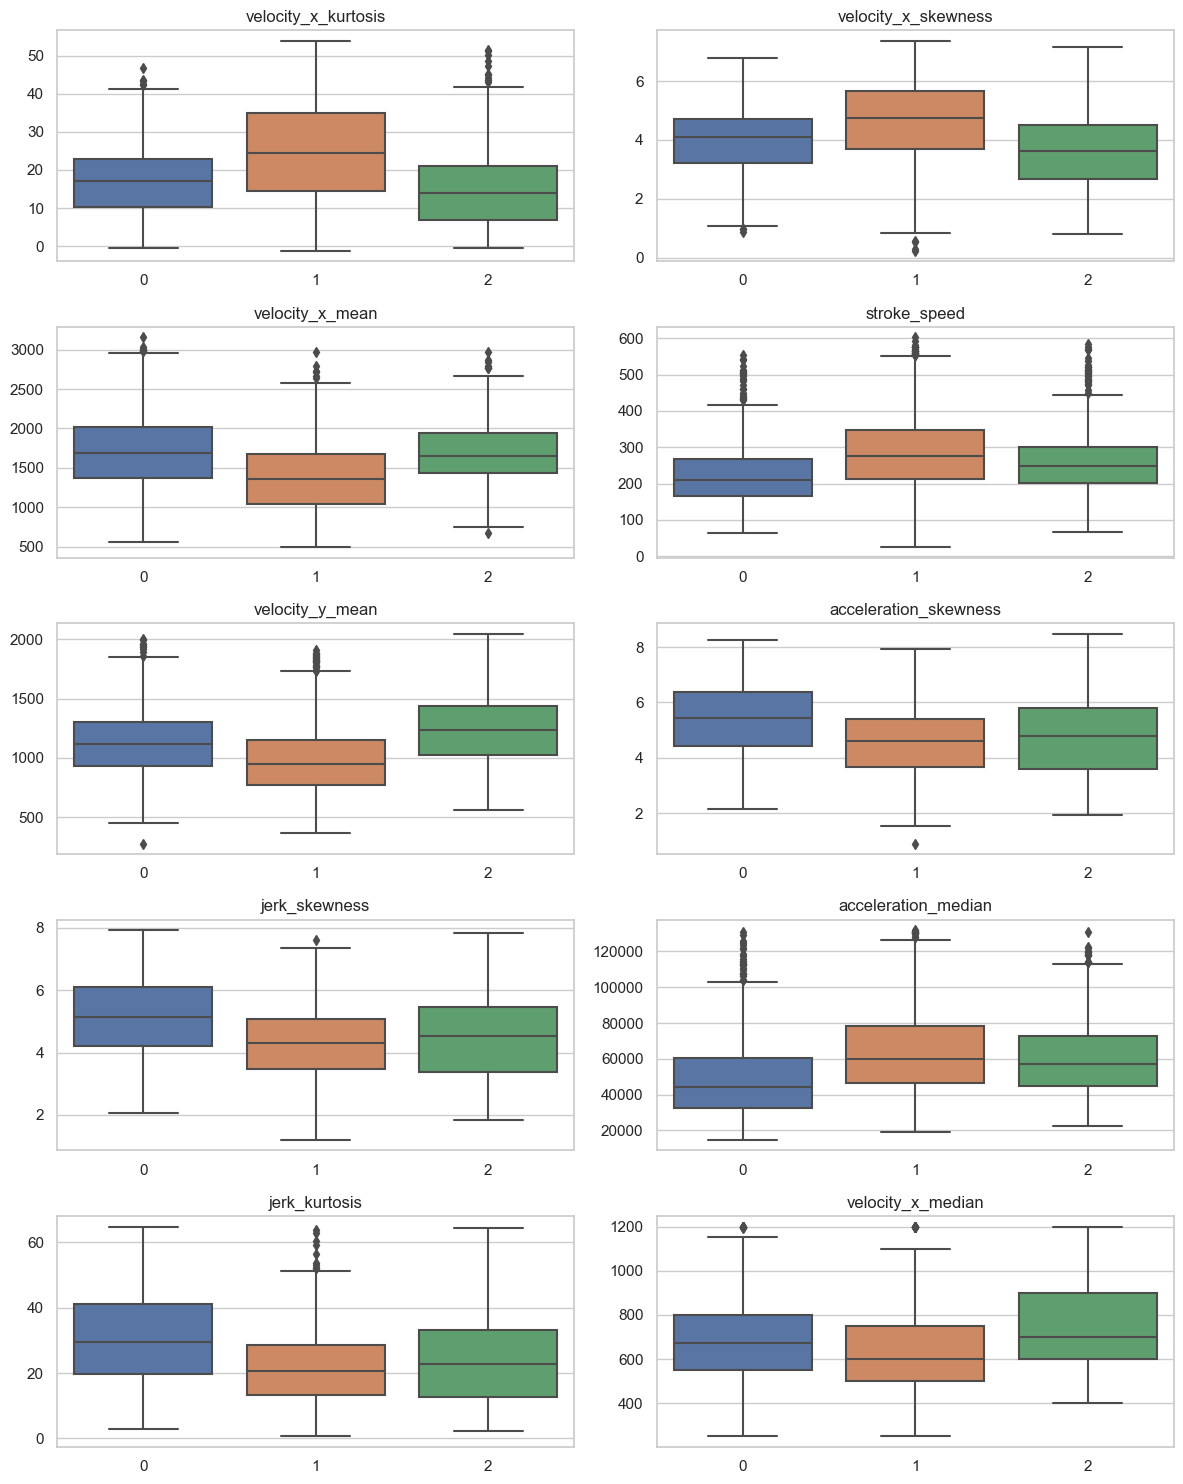

In [68]:
# Creación de boxplots para las 10 características más importantes después de la eliminación de outliers
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))
axes = axes.flatten()

for i, var in enumerate(top_10_variables):
    sns.boxplot(x='group', y=var, data=data_sin_outliers_top_10, ax=axes[i])
    axes[i].set_title(var)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Ajuste de la disposición de los gráficos
plt.tight_layout()
plt.show()

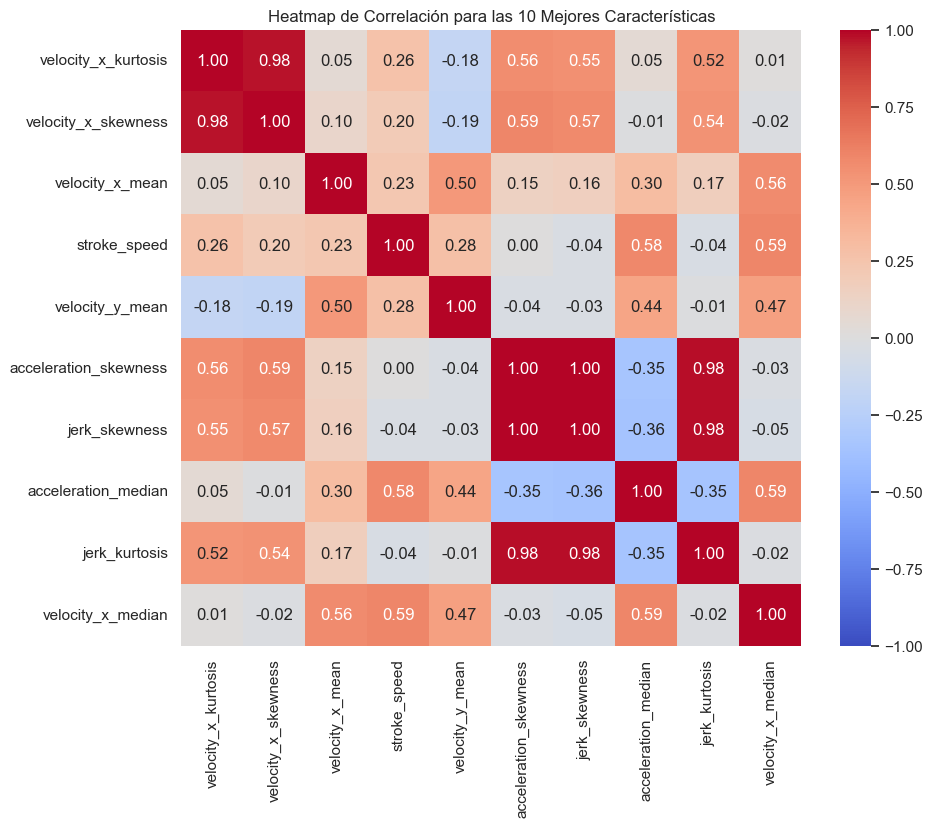

In [69]:
# Cálculo de la matriz de correlación para las 10 características más importantes
matriz_correlacion_top_10 = data_sin_outliers_top_10[top_10_variables].corr()

# Visualización de la matriz de correlación para las 10 características más importantes
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion_top_10, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Heatmap de Correlación para las 10 Mejores Características')
plt.show()